In [13]:
import numpy as np
import matplotlib.pyplot as plt

**Hard to calculate and estimate the force/power of jump without force plates measurements, 
due to the variable force/Power/acelaration/velocity of the movement. 
The jump height inference from squat values are not too simple due to the lack or not of fast-twitch (Rate of force development) training.
Another interesting and dificulty, it's related to running jump and standing jump physical aspects**

**From energy perspective using basic physics, potential energy**
$$E_{jump}=mgh$$

**For a male with 80 kg, in order to jump 50/90 cm, it is required**

$$E_{jump50}=80\times 9.81\times 0.5=392.4 W $$
$$E_{jump90}=80\times 9.81\times 0.9=706.32 W $$




**Because of the kinetic movement of the body, the body transform kinetic energy almost totally in potential energy from the resting (intial velocity equal 0) disregarding air drag and body issues**
$$E_{jump50}=KE_{jump50}$$
$$E_{jump50}=\frac{mv_{avg}^2}{2}$$
$$v_{avg}=\sqrt{\frac{2\times E_{jump50}}{m}}=3.13 \ m/s$$

**Oh no, that's the hard part, let's follow my reasoning, I DON'T KNOW if am I wrong, that's my nightmare hahhaha. The initial velocity is zero, only at the point we bend the hips and flex the knee in order to create power, after that moment we apply some force, we accelarate, the application of force ends up when we leave the ground, after that we have only desacceleration force (gravity). Then, it means the peak velocity occurs right after leaving the ground? Considering the takeoff velocity, the maximum one, let's go deep into the kinematics equation in order to try and to get more info**
$$V_f=V_{0}t+\frac{gt^2}{2}=0$$



**Relating momentum and Power**
$$Work=Fd$$
**Impulse**
$$I=\Delta P= F \Delta t =m(v_{f}-mv_{0})$$
**Integration is not that monster, I don't know, but it is not hard**
$$I=\Delta P= \sum \int_{t_0}^{t_f} F \Delta t$$


**However to anayze the vertical leap, it's more meaningful in terms of Power**

**Lewis Average Power**

Average Power (Watts) = √ 4.9 x body mass (kg)  x √ jump-reach score (m) x 9.81 

**Johnson & Bahamonde Formula**

Power-peak (W) = 78.6 · VJ (cm) + 60.3 · mass (kg) - 15.3 · height (cm) - 1,308

Power-avg (W) = 43.8 · VJ (cm) + 32.7 · mass (kg) - 16.8 · height (cm) + 431

**Sayers Peak Anaerobic Power output**
PAPw (Watts) = 60.7 · jump height(cm) + 45.3 · body mass(kg) - 2055

In [12]:
# h height in cm 
# VJ vertical jump in cm
# BW Body Weight in kg
def jumpPeakPower(Ref,BW,h,VJ):
    if Ref=='Bahamonde':
        PW= 78.6*VJ + 60.3*BW - 15.3*h - 1,308
        return PW
    elif Ref=='Sayer':
        PW= 60.7*VJ+ 45.3*BW - 2055
        return PW
    
def jumpAvgPower(Ref,BW,h):
    if Ref=='Lewis':
        PW= np.sqrt(4.9)*BW* np.sqrt(h/100)*9.81 
        return PW
    elif Ref=='Bahamonde':
        PW= 43.8*h + 32.7*BW - 16.8*h + 431
        return PW

In [7]:
BW= 80 # Body Weight mass kg
g=9.81 # Gravitational acceleration
VJ=50 # Vertical jump in cm

# Energy
Ejump=BW*g*VJ/100
Vmax=np.sqrt(2*Ejump/BW)

print('Ejump: {} W'.format(Ejump))
print('Vmax: {} m/s'.format(Vmax))


Ejump: 392.4 W
Vmax: 3.1320919526731648 m/s


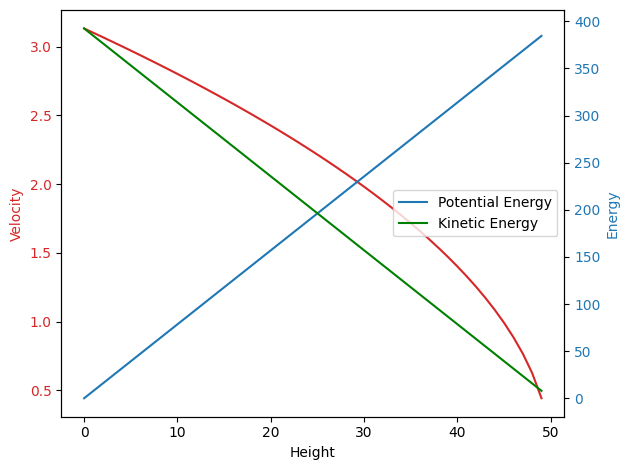

In [22]:
#Analazing the movement
VJ=50
heightMovement=np.arange(0,50)
EMAX=BW*g*VJ/100
Epmovement=BW*g*heightMovement/100
KEmovement=EMAX-Epmovement
Vmovement=np.sqrt(2*KEmovement/BW)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Height')
ax1.set_ylabel('Velocity', color=color)
ax1.plot(heightMovement, Vmovement, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2.legend(['Velocity'])

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(heightMovement, Epmovement, color=color)
ax2.plot(heightMovement, KEmovement, color='g')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['Potential Energy', 'Kinetic Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()